In [1390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [1391]:
weather=pd.read_csv('3667122.csv',index_col='DATE')

In [1392]:
weather

,STATION,NAME,DAPR,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11,WT14
DATE,,,,,,,,,,,,,,,,,,
1960-06-01,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.02,0.0,0.0,73.0,43.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-02,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,81.0,40.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-03,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.06,0.0,0.0,78.0,53.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-04,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,83.0,54.0,79.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-05,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,83.0,54.0,75.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.28,NaN,NaN,61.0,39.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-29,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.04,NaN,NaN,68.0,34.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-30,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,NaN,NaN,56.0,39.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1393]:
weather.loc['1960-06-03',:]

STATION            USC00186620
NAME       OAKLAND 1 SE, MD US
DAPR                       NaN
MDPR                       NaN
MDSF                       NaN
PRCP                      0.06
SNOW                       0.0
SNWD                       0.0
TMAX                      78.0
TMIN                      53.0
TOBS                      75.0
WT01                       NaN
WT03                       NaN
WT04                       NaN
WT05                       NaN
WT06                       NaN
WT11                       NaN
WT14                       NaN
Name: 1960-06-03, dtype: object

In [1394]:
weather.loc['1960-06-03':'1960-09-03',:]

,STATION,NAME,DAPR,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11,WT14
DATE,,,,,,,,,,,,,,,,,,
1960-06-03,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.06,0.0,0.0,78.0,53.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-04,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,83.0,54.0,79.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-05,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,83.0,54.0,75.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-06,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,75.0,56.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-07,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,73.0,36.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-30,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,86.0,62.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-08-31,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.37,0.0,0.0,82.0,62.0,72.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-09-01,USC00186620,"OAKLAND 1 SE, MD US",NaN,NaN,NaN,0.00,0.0,0.0,82.0,61.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1395]:
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
DAPR       22909
MDPR       22907
MDSF       22913
PRCP         251
SNOW         422
SNWD        2295
TMAX          25
TMIN          23
TOBS         122
WT01       21045
WT03       22026
WT04       22842
WT05       22853
WT06       22830
WT11       22874
WT14       22913
dtype: int64

In [1396]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
DAPR       0.999782
MDPR       0.999695
MDSF       0.999956
PRCP       0.010954
SNOW       0.018417
SNWD       0.100157
TMAX       0.001091
TMIN       0.001004
TOBS       0.005324
WT01       0.918434
WT03       0.961246
WT04       0.996858
WT05       0.997338
WT06       0.996334
WT11       0.998254
WT14       0.999956
dtype: float64

In [1397]:
weather_core=weather[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()

In [1398]:
weather_core.columns=['precip','snow','snow_depth','temp_max','temp_min']

In [1399]:
weather_core

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-06-01,0.02,0.0,0.0,73.0,43.0
1960-06-02,0.00,0.0,0.0,81.0,40.0
1960-06-03,0.06,0.0,0.0,78.0,53.0
1960-06-04,0.00,0.0,0.0,83.0,54.0
1960-06-05,0.00,0.0,0.0,83.0,54.0
...,...,...,...,...,...
2024-03-27,0.28,NaN,NaN,61.0,39.0
2024-03-29,0.04,NaN,NaN,68.0,34.0
2024-03-30,0.00,NaN,NaN,56.0,39.0


In [1400]:
weather_core.apply(pd.isnull).sum()

precip         251
snow           422
snow_depth    2295
temp_max        25
temp_min        23
dtype: int64

In [1401]:
weather_core.apply(pd.isnull).sum()/weather_core.shape[0]

precip        0.010954
snow          0.018417
snow_depth    0.100157
temp_max      0.001091
temp_min      0.001004
dtype: float64

In [1402]:
weather_core['snow'].value_counts()

snow
0.0     19993
1.0       437
2.0       292
0.5       284
3.0       187
        ...  
11.3        1
3.4         1
7.1         1
3.7         1
4.4         1
Name: count, Length: 94, dtype: int64

In [1403]:
weather_core['snow_depth'].value_counts()

snow_depth
0.0     18035
1.0       562
2.0       405
3.0       292
4.0       245
5.0       186
6.0       146
7.0       105
10.0       96
8.0        84
9.0        67
11.0       64
12.0       63
14.0       41
13.0       39
15.0       35
16.0       27
18.0       20
17.0       17
20.0       16
23.0       14
22.0       13
19.0       11
21.0       10
24.0        5
25.0        4
33.0        4
26.0        3
27.0        3
31.0        2
30.0        2
41.0        2
40.0        1
Name: count, dtype: int64

In [1404]:
weather_core['precip'].value_counts()

precip
0.00    12159
0.02      661
0.03      575
0.05      566
0.01      538
        ...  
2.78        1
3.30        1
3.82        1
3.48        1
2.99        1
Name: count, Length: 227, dtype: int64

In [1405]:
weather_core[pd.isnull(weather_core['precip'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1979-03-26,NaN,1.0,1.0,36.0,20.0
1985-01-06,NaN,1.0,1.0,46.0,24.0
1985-11-08,NaN,0.0,0.0,49.0,33.0
1987-06-05,NaN,NaN,NaN,71.0,43.0
1989-12-27,NaN,1.0,14.0,25.0,-7.0
...,...,...,...,...,...
2023-11-01,NaN,2.0,2.0,46.0,23.0
2023-12-17,NaN,NaN,NaN,55.0,18.0
2023-12-18,NaN,NaN,NaN,47.0,35.0


In [1406]:
weather_core['precip']=weather_core['precip'].fillna(0)

In [1407]:
weather_core.apply(pd.isnull).sum()

precip           0
snow           422
snow_depth    2295
temp_max        25
temp_min        23
dtype: int64

In [1408]:
weather_core[pd.isnull(weather_core['temp_max'])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1961-05-20,0.04,0.0,0.0,NaN,29.0
1962-06-20,0.18,0.0,0.0,NaN,NaN
2007-06-15,0.00,0.0,0.0,NaN,46.0
2021-05-01,0.00,0.0,0.0,NaN,NaN
2021-07-19,0.01,0.0,0.0,NaN,61.0
2021-08-30,0.10,0.0,0.0,NaN,65.0
2021-09-29,1.27,0.0,0.0,NaN,54.0
2021-09-30,0.02,0.0,0.0,NaN,40.0
2021-10-27,0.29,0.0,0.0,NaN,40.0


In [1409]:
weather_core['temp_max']=weather_core['temp_max'].fillna(method='ffill')

In [1410]:
weather_core.apply(pd.isnull).sum()

precip           0
snow           422
snow_depth    2295
temp_max         0
temp_min        23
dtype: int64

In [1411]:
weather_core['temp_min']=weather_core['temp_min'].fillna(method='ffill')

In [1412]:
weather_core.apply(pd.isnull).sum()

precip           0
snow           422
snow_depth    2295
temp_max         0
temp_min         0
dtype: int64

In [1413]:
weather_core['snow'].value_counts()

snow
0.0     19993
1.0       437
2.0       292
0.5       284
3.0       187
        ...  
11.3        1
3.4         1
7.1         1
3.7         1
4.4         1
Name: count, Length: 94, dtype: int64

In [1414]:
weather_core['snow']=weather_core['snow'].fillna(0)

In [1415]:
weather_core.apply(pd.isnull).sum()

precip           0
snow             0
snow_depth    2295
temp_max         0
temp_min         0
dtype: int64

In [1416]:
weather_core['snow_depth'].value_counts()

snow_depth
0.0     18035
1.0       562
2.0       405
3.0       292
4.0       245
5.0       186
6.0       146
7.0       105
10.0       96
8.0        84
9.0        67
11.0       64
12.0       63
14.0       41
13.0       39
15.0       35
16.0       27
18.0       20
17.0       17
20.0       16
23.0       14
22.0       13
19.0       11
21.0       10
24.0        5
25.0        4
33.0        4
26.0        3
27.0        3
31.0        2
30.0        2
41.0        2
40.0        1
Name: count, dtype: int64

In [1417]:
weather_core['snow_depth']=weather_core['snow_depth'].fillna(0)

In [1418]:
weather_core.apply(pd.isnull).sum()

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [1419]:
weather_core.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [1420]:
weather_core.index

Index(['1960-06-01', '1960-06-02', '1960-06-03', '1960-06-04', '1960-06-05',
       '1960-06-06', '1960-06-07', '1960-06-08', '1960-06-09', '1960-06-10',
       ...
       '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
       '2024-03-27', '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01'],
      dtype='object', name='DATE', length=22914)

In [1421]:
weather_core.index=pd.to_datetime(weather_core.index)

In [1422]:
weather_core.index

DatetimeIndex(['1960-06-01', '1960-06-02', '1960-06-03', '1960-06-04',
               '1960-06-05', '1960-06-06', '1960-06-07', '1960-06-08',
               '1960-06-09', '1960-06-10',
               ...
               '2024-03-22', '2024-03-23', '2024-03-24', '2024-03-25',
               '2024-03-26', '2024-03-27', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-01'],
              dtype='datetime64[ns]', name='DATE', length=22914, freq=None)

In [1423]:
weather_core.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=22914)

In [1424]:
weather_core.apply(lambda x:(x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

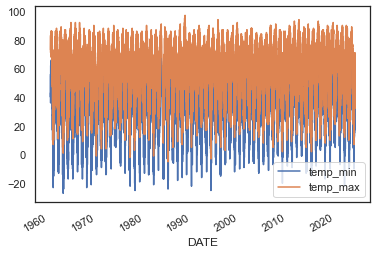

In [1425]:
weather_core[['temp_min','temp_max']].plot()
plt.show()

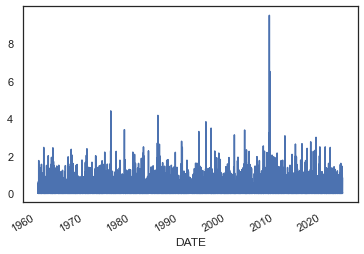

In [1426]:
weather_core['precip'].plot()
plt.show()

In [1427]:
weather_core.groupby(weather_core.index.year).mean()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960,0.116355,0.150935,0.883178,65.158879,40.373832
1961,0.141123,0.281918,1.632877,58.389041,36.364384
1962,0.127014,0.269863,0.794521,57.750685,34.849315
1963,0.120877,0.161644,0.660274,58.021918,32.876712
1964,0.118005,0.203825,0.784153,60.275956,34.811475
...,...,...,...,...,...
2020,0.124767,0.130959,0.038356,62.082192,40.536986
2021,0.117695,0.025749,0.092814,65.380240,42.592814
2022,0.117699,0.196164,0.252055,61.306849,37.882192


In [ ]:
weather_core.describe()

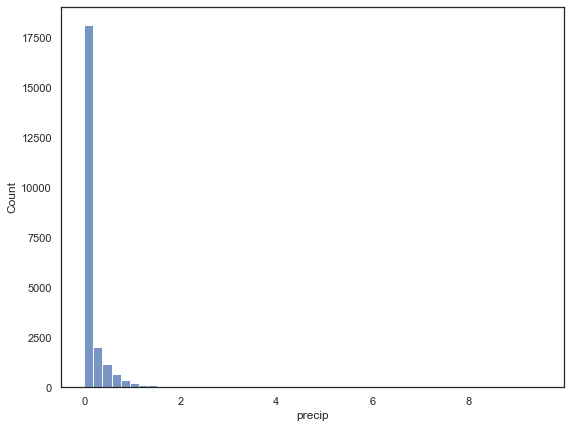

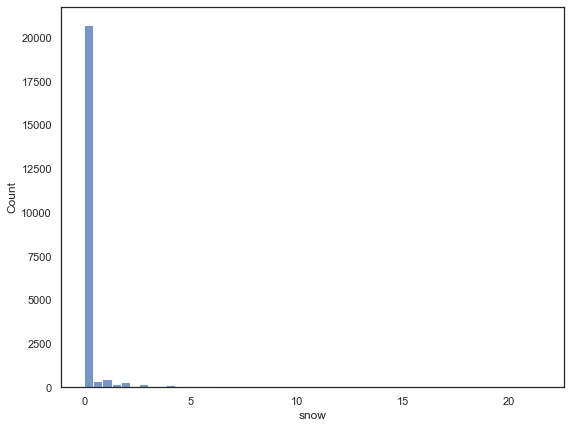

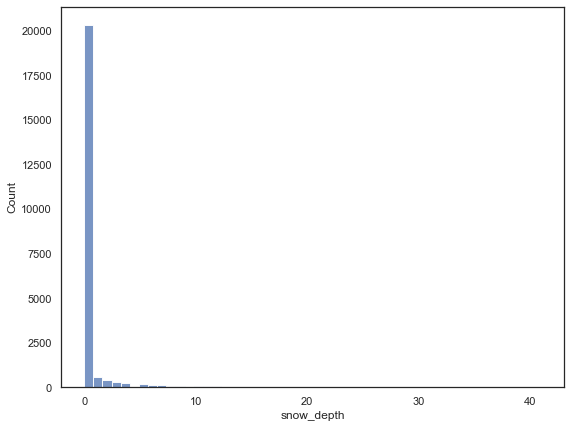

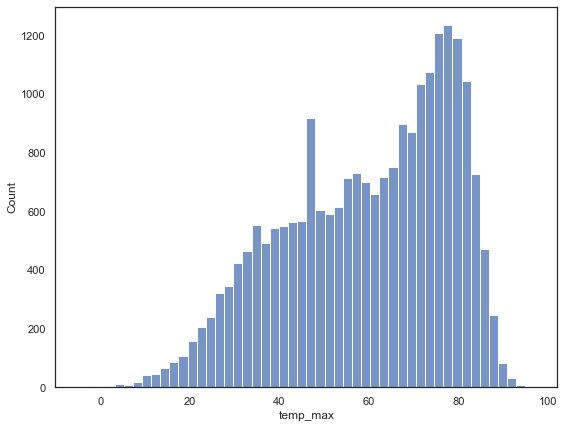

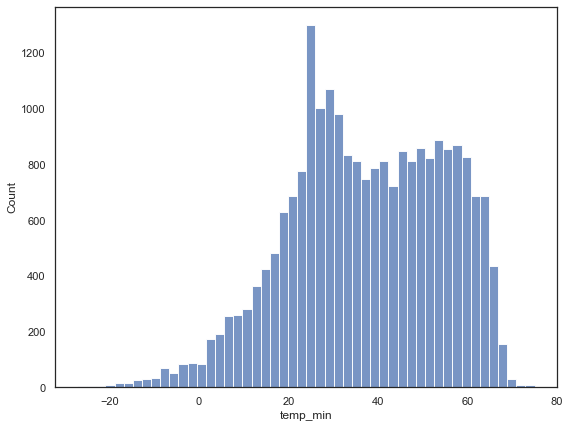

In [1429]:
for column in weather_core.columns:
    plt.figure(figsize=(9,7))
    sns.histplot(data=weather_core,x=column,bins=50)
    plt.show()

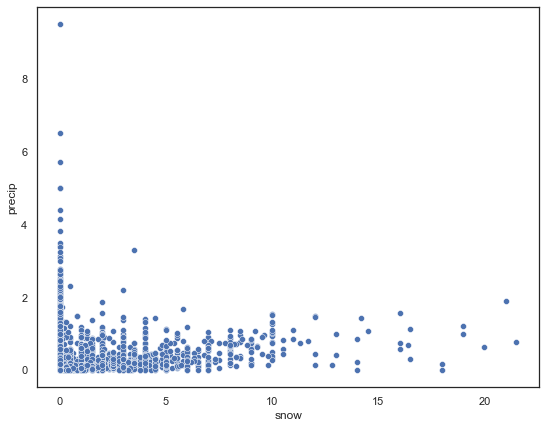

In [1430]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='snow',y='precip')
plt.show()

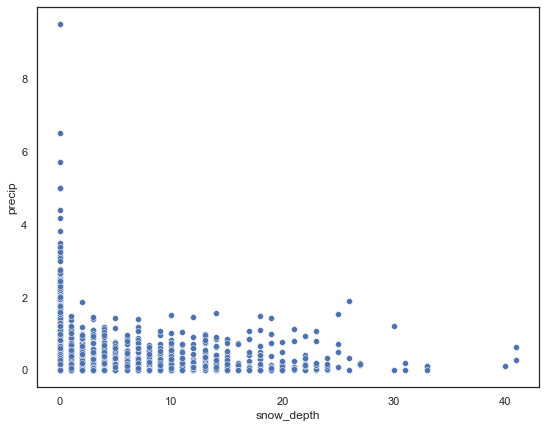

In [1431]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='snow_depth',y='precip')
plt.show()

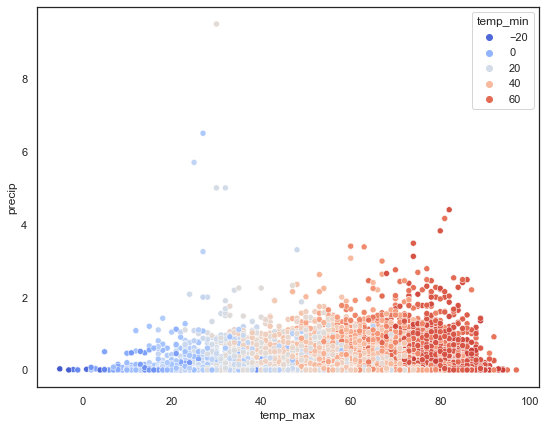

In [1432]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_max',y='precip',hue='temp_min',palette='coolwarm')
plt.show()

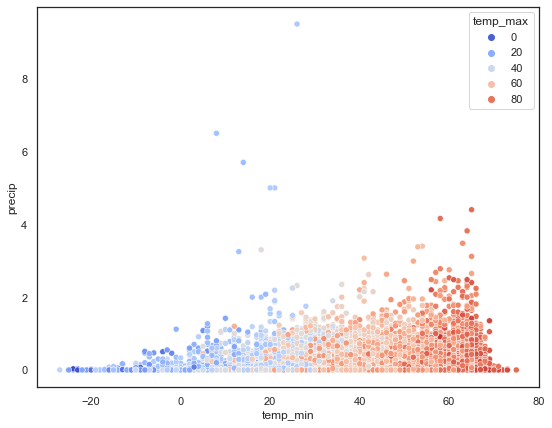

In [1433]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='precip',hue='temp_max',palette='coolwarm')
plt.show()

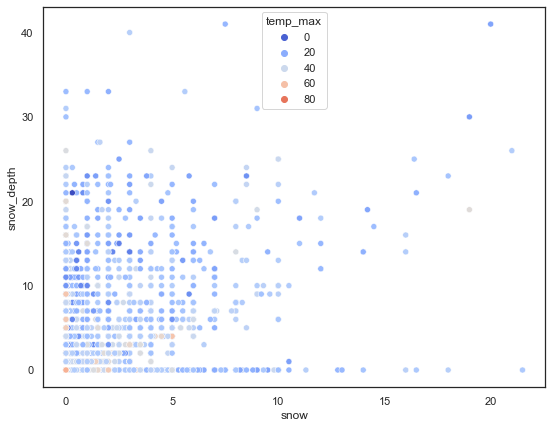

In [1434]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='snow',y='snow_depth',hue='temp_max',palette='coolwarm')
plt.show()

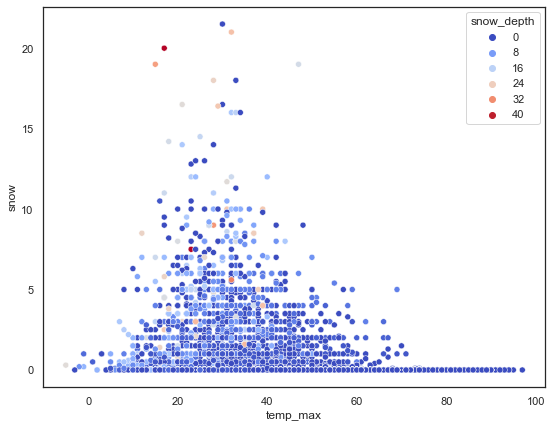

In [1435]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_max',y='snow',hue='snow_depth',palette='coolwarm')
plt.show()

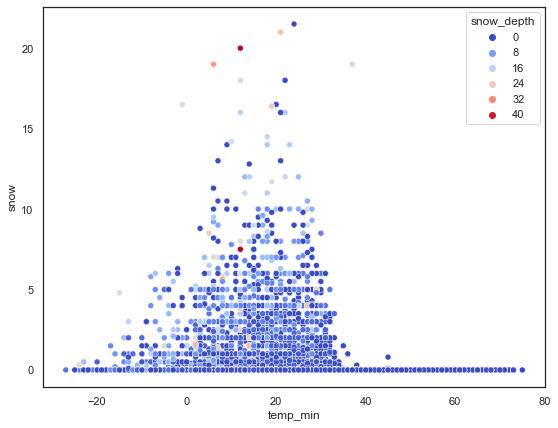

In [1436]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='snow',hue='snow_depth',palette='coolwarm')
plt.show()

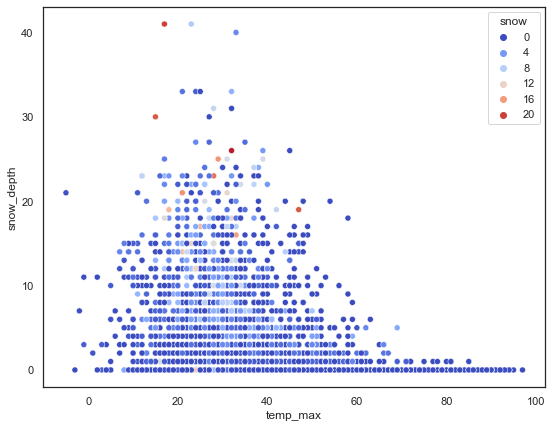

In [1437]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_max',y='snow_depth',hue='snow',palette='coolwarm')
plt.show()

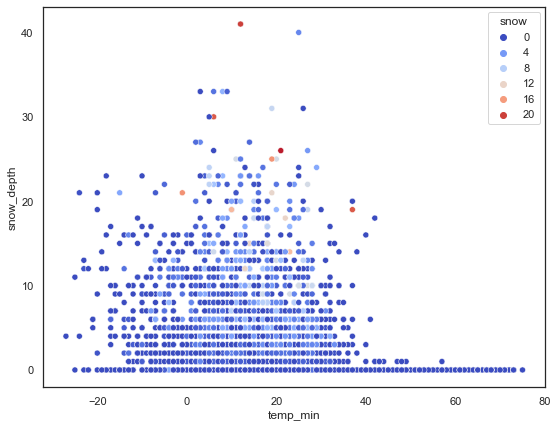

In [1438]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='snow_depth',hue='snow',palette='coolwarm')
plt.show()

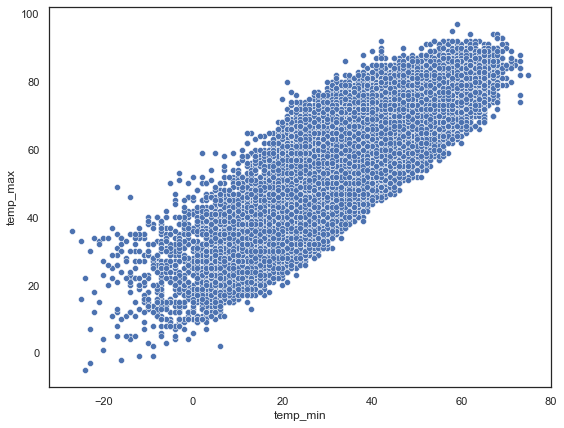

In [1439]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='temp_max')
plt.show()

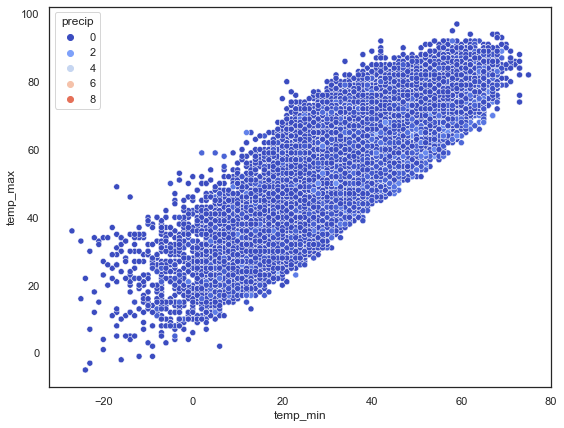

In [1440]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='temp_max',hue='precip',palette='coolwarm')
plt.show()

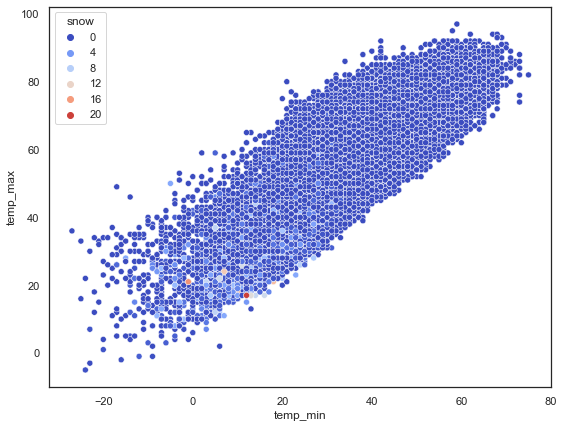

In [1441]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='temp_max',hue='snow',palette='coolwarm')
plt.show()

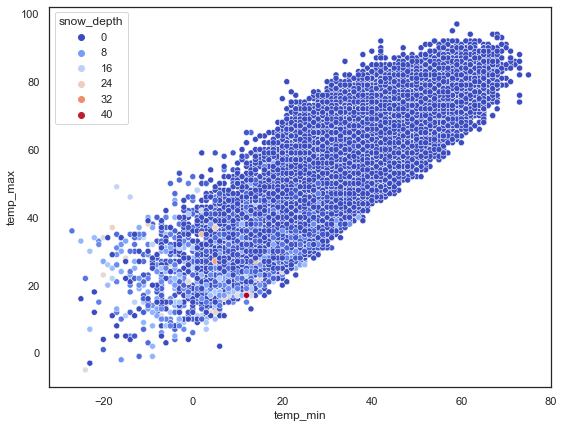

In [1442]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=weather_core,x='temp_min',y='temp_max',hue='snow_depth',palette='coolwarm')
plt.show()

<Figure size 648x504 with 0 Axes>

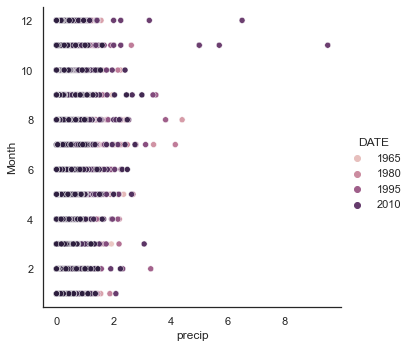

In [1443]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='precip',y=weather_core.index.month,hue=weather_core.index.year)
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

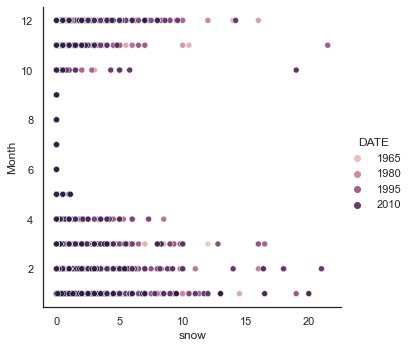

In [1444]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='snow',y=weather_core.index.month,hue=weather_core.index.year)
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

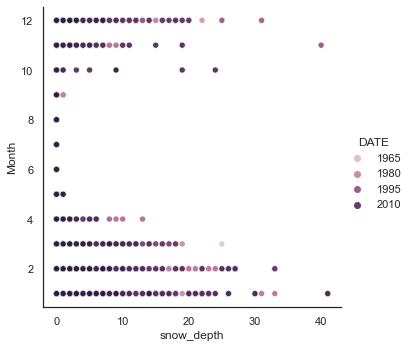

In [1445]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='snow_depth',y=weather_core.index.month,hue=weather_core.index.year)
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

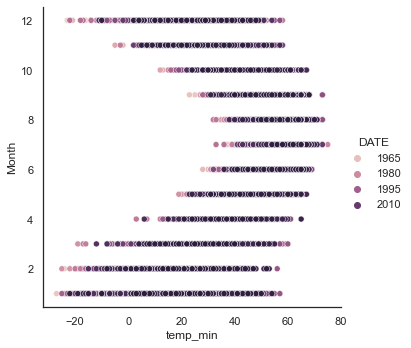

In [1446]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='temp_min',y=weather_core.index.month,hue=weather_core.index.year)
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

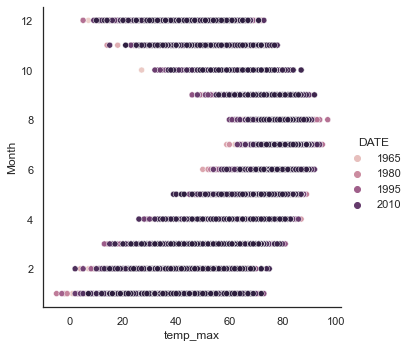

In [1447]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='temp_max',y=weather_core.index.month,hue=weather_core.index.year)
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

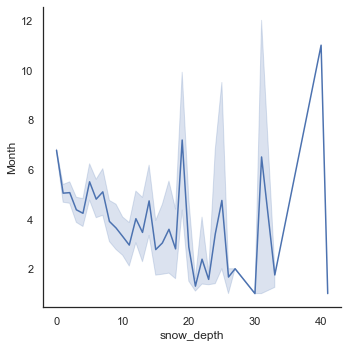

In [1448]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='snow_depth',y=weather_core.index.month,kind='line')
plt.ylabel('Month')
plt.show()

<Figure size 648x504 with 0 Axes>

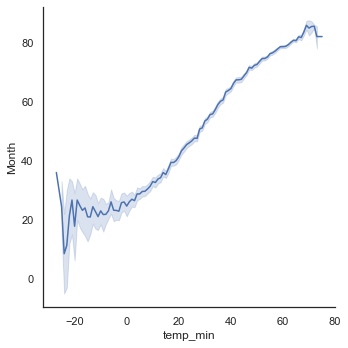

In [1449]:
plt.figure(figsize=(9,7))
sns.relplot(data=weather_core,x='temp_min',y='temp_max',kind='line')
plt.ylabel('Month')
plt.show()

In [1450]:
weather_core_copy=weather_core.copy()
weather_core_copy['year']=weather_core.index.year

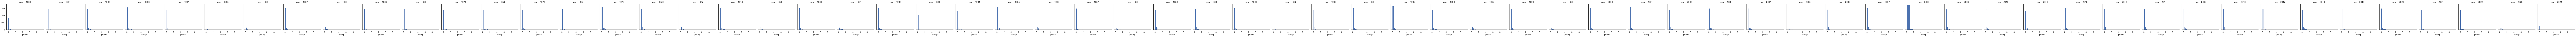

In [1451]:
b=sns.FacetGrid(weather_core_copy,col='year')
b.map(plt.hist,'precip')
plt.show()

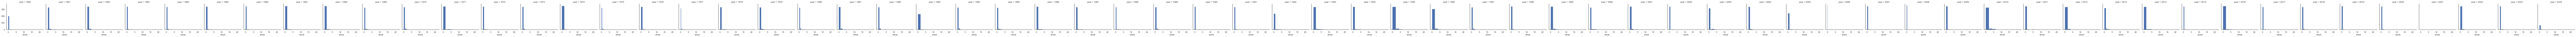

In [1452]:
b=sns.FacetGrid(weather_core_copy,col='year')
b.map(plt.hist,'snow')
plt.show()

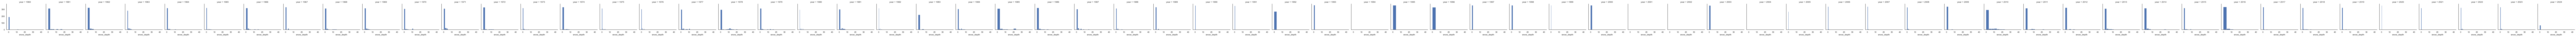

In [1453]:
b=sns.FacetGrid(weather_core_copy,col='year')
b.map(plt.hist,'snow_depth')
plt.show()

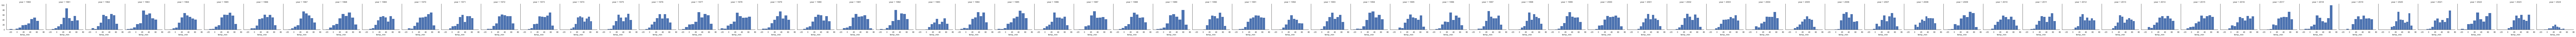

In [1454]:
b=sns.FacetGrid(weather_core_copy,col='year')
b.map(plt.hist,'temp_min')
plt.show()

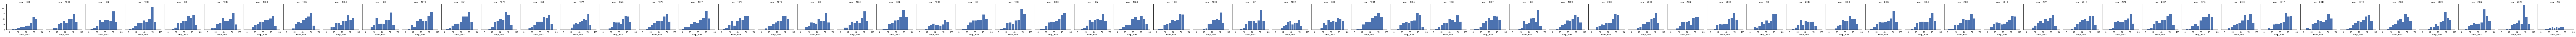

In [1455]:
b=sns.FacetGrid(weather_core_copy,col='year')
b.map(plt.hist,'temp_max')
plt.show()

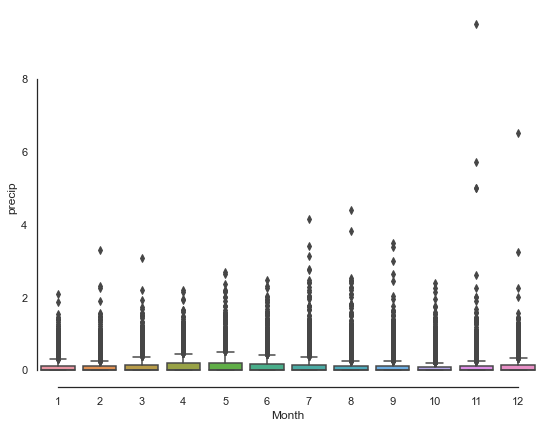

In [1456]:
plt.figure(figsize=(9,7))
sns.set(style='white',color_codes=True)
sns.boxplot(data=weather_core,x=weather_core.index.month,y='precip')
sns.despine(offset=0,trim=True)
plt.xlabel('Month')
plt.show()

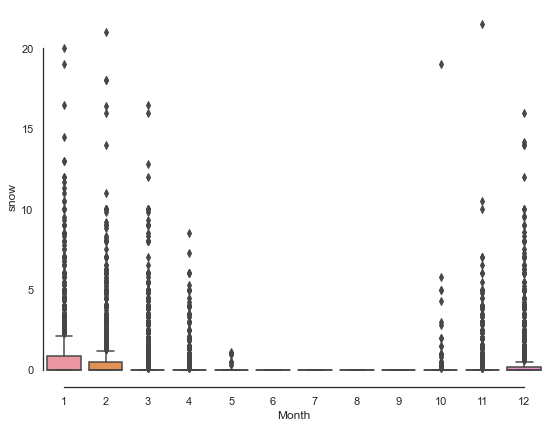

In [1457]:
plt.figure(figsize=(9,7))
sns.set(style='white',color_codes=True)
sns.boxplot(data=weather_core,x=weather_core.index.month,y='snow')
sns.despine(offset=0,trim=True)
plt.xlabel('Month')
plt.show()

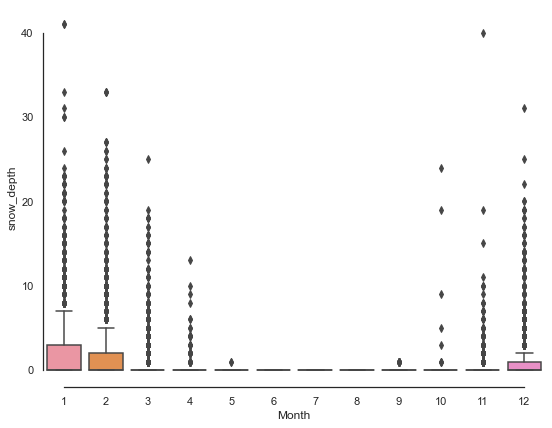

In [1458]:
plt.figure(figsize=(9,7))
sns.set(style='white',color_codes=True)
sns.boxplot(data=weather_core,x=weather_core.index.month,y='snow_depth')
sns.despine(offset=0,trim=True)
plt.xlabel('Month')
plt.show()

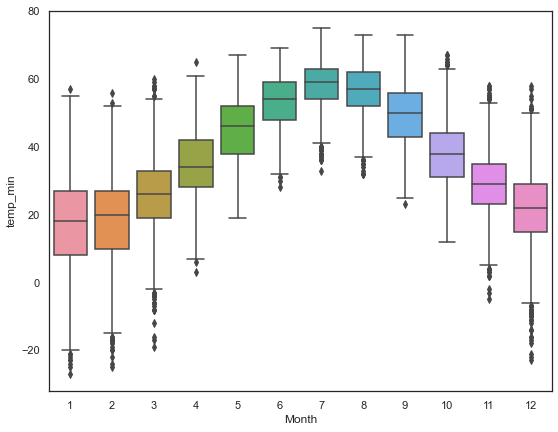

In [1459]:
plt.figure(figsize=(9,7))
sns.set(style='white',color_codes=True)
sns.boxplot(data=weather_core,x=weather_core.index.month,y='temp_min')
plt.xlabel('Month')
plt.show()

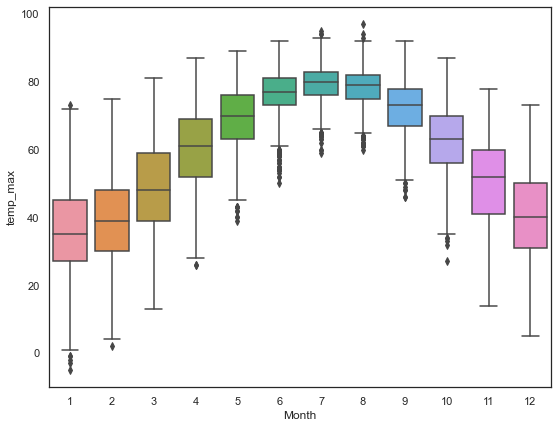

In [1460]:
plt.figure(figsize=(9,7))
sns.set(style='white',color_codes=True)
sns.boxplot(data=weather_core,x=weather_core.index.month,y='temp_max')
plt.xlabel('Month')
plt.show()

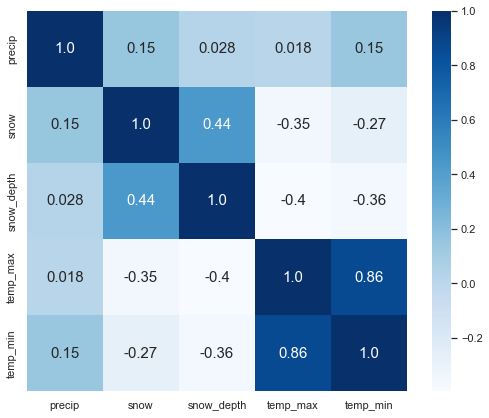

In [1461]:
plt.figure(figsize=(9,7))
sns.heatmap(weather_core.corr(),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()

In [1462]:
weather_core['target']=weather_core.shift(-1)['temp_max']

In [1463]:
weather_core

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-06-01,0.02,0.0,0.0,73.0,43.0,81.0
1960-06-02,0.00,0.0,0.0,81.0,40.0,78.0
1960-06-03,0.06,0.0,0.0,78.0,53.0,83.0
1960-06-04,0.00,0.0,0.0,83.0,54.0,83.0
1960-06-05,0.00,0.0,0.0,83.0,54.0,75.0
...,...,...,...,...,...,...
2024-03-27,0.28,0.0,0.0,61.0,39.0,68.0
2024-03-29,0.04,0.0,0.0,68.0,34.0,56.0
2024-03-30,0.00,0.0,0.0,56.0,39.0,69.0


In [1464]:
weather_core=weather_core.iloc[:-1,:].copy()

In [1465]:
weather_core

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-06-01,0.02,0.0,0.0,73.0,43.0,81.0
1960-06-02,0.00,0.0,0.0,81.0,40.0,78.0
1960-06-03,0.06,0.0,0.0,78.0,53.0,83.0
1960-06-04,0.00,0.0,0.0,83.0,54.0,83.0
1960-06-05,0.00,0.0,0.0,83.0,54.0,75.0
...,...,...,...,...,...,...
2024-03-26,0.00,0.0,0.0,60.0,32.0,61.0
2024-03-27,0.28,0.0,0.0,61.0,39.0,68.0
2024-03-29,0.04,0.0,0.0,68.0,34.0,56.0


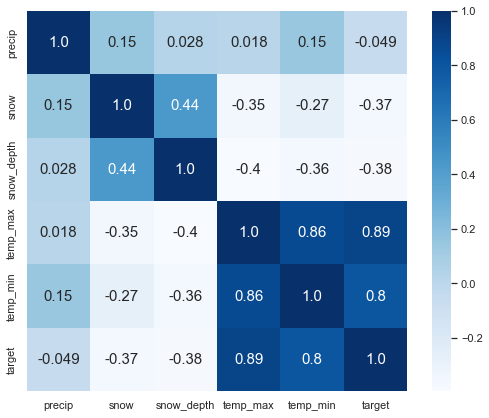

In [1466]:
plt.figure(figsize=(9,7))
sns.heatmap(weather_core.corr(),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='.2',cmap='Blues')
plt.show()